In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [7]:
y_train_odd = y_train % 2
y_test_odd = y_test % 2

In [8]:
y_train_odd

array([1, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [9]:
import matplotlib.pyplot as plt

In [10]:
X_train.shape

(60000, 28, 28)

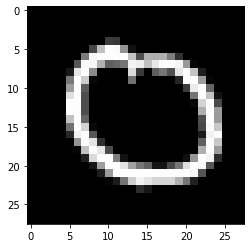

In [11]:
plt.imshow(X_train[108], cmap="gray")

In [16]:
y_train_hot = to_categorical(y_train, num_classes=10)
y_test_hot = to_categorical(y_test, num_classes=10)

y_train_odd_hot = to_categorical(y_train_odd, num_classes=2)
y_test_odd_hot = to_categorical(y_test_odd, num_classes=2)

In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dense
from tensorflow.keras.losses import categorical_crossentropy

In [18]:
# model = Model()

In [24]:
in_layer = Input(shape = (28, 28))
reshape = Reshape((784,))(in_layer)
d1 = Dense(400, activation="tanh")(reshape)
d2 = Dense(100, activation="tanh")(d1)
d31 = Dense(50, activation="tanh")(d2)
out1 = Dense(10, activation="softmax")(d31)
d32 = Dense(50, activation="tanh")(d2)
d42 =  Dense(10, activation="tanh")(d32)
out2 =  Dense(2, activation="softmax")(d42)

In [25]:
model = Model(in_layer, [out1, out2])

In [26]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 784)          0           input_2[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 400)          314000      reshape_1[0][0]                  
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 100)          40100       dense_7[0][0]                    
____________________________________________________________________________________________

In [27]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [28]:
model.fit(X_train, [y_train_hot, y_train_odd_hot], epochs=10, steps_per_epoch=10)

Epoch 1/10
10/10 [==============================] - 4s 252ms/step - loss: 1.8281 - dense_10_loss: 1.3459 - dense_13_loss: 0.4822 - dense_10_accuracy: 0.6084 - dense_13_accuracy: 0.7769
Epoch 2/10
10/10 [==============================] - 3s 281ms/step - loss: 0.9245 - dense_10_loss: 0.6167 - dense_13_loss: 0.3078 - dense_10_accuracy: 0.8511 - dense_13_accuracy: 0.8889
Epoch 3/10
10/10 [==============================] - 3s 270ms/step - loss: 0.6587 - dense_10_loss: 0.4306 - dense_13_loss: 0.2281 - dense_10_accuracy: 0.8939 - dense_13_accuracy: 0.9219
Epoch 4/10
10/10 [==============================] - 3s 255ms/step - loss: 0.5146 - dense_10_loss: 0.3402 - dense_13_loss: 0.1744 - dense_10_accuracy: 0.9123 - dense_13_accuracy: 0.9436
Epoch 5/10
10/10 [==============================] - 3s 262ms/step - loss: 0.4323 - dense_10_loss: 0.2903 - dense_13_loss: 0.1420 - dense_10_accuracy: 0.9226 - dense_13_accuracy: 0.9559
Epoch 6/10
10/10 [==============================] - 3s 253ms/step - loss: 0

In [30]:
model.evaluate(X_test, [y_test_hot, y_test_odd_hot], verbose=0)

[0.27794501185417175,
 0.19066667556762695,
 0.0872783288359642,
 0.9462000131607056,
 0.9718999862670898]

In [31]:
X_test.shape

(10000, 28, 28)

In [32]:
output1, output2 = model.predict(X_test[:20])

In [33]:
import numpy as np

In [34]:
np.argmax(output1, axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

In [35]:
np.argmax(output2, axis=1)

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [48]:
y_test[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

In [65]:
vals = [.005, .006]

In [66]:
exps = np.exp(vals)

In [67]:
exps / np.sum(exps)

array([0.49975, 0.50025])

In [37]:
model.save("two_out.tf", save_format="tf")

INFO:tensorflow:Assets written to: two_out.tf/assets
